In [12]:
# instruction cells will be displayed in green
from IPython.display import HTML
style = "<style>div.instruction { background-color: #90ee90;border-color: #90ee90; border-left: 5px solid #90ee90; padding: 0.5em;}</style>"
HTML(style)

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t
from scipy.stats import norm

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [13]:
HTML(<div class="instruction">
    1. Is the distribution of body temperatures normal?
    <ul>
    <li>Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.</li>
    <li>Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test</li>
    </ul>
</div>)

SyntaxError: invalid syntax (<ipython-input-13-028fe9395787>, line 1)

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [6]:
# create temperature object that contains all the temperatures
temperature = df.temperature
len(temperature)

130

In [4]:
# create x and y values for ecdf
x_ecdf, y_ecdf = ecdf(temperature)

In [10]:
# calculate mean and standard deviation of sample to create samples from normal distribution with same mean and sd as sample
temp_mean = np.mean(temperature)
temp_sd = np.std(temperature)
temp_theo = np.random.normal(loc = temp_mean, scale = temp_sd, size = len(temperature))

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


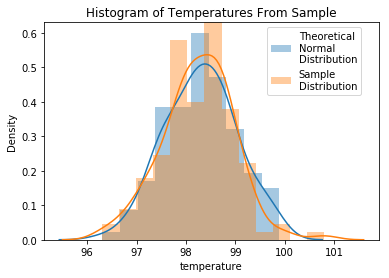

In [26]:
# create histogram of theoretical normal distribution vs sample distribution
_ = sns.distplot(temp_theo)
_ = sns.distplot(temperature, norm_hist = True)
_ = plt.title('Histogram of Temperatures From Sample')
_ = plt.ylabel('Density')
_ = plt.legend(('Theoretical\nNormal\nDistribution', 'Sample\nDistribution'), bbox_to_anchor = (0.65, 1))
plt.show()

From a sample size of 130, it seems that the distribution of temperatures are pretty normally distributed. I see some deviation in that the sample distribution might have a slightly long right tail (slightly right-skewed).

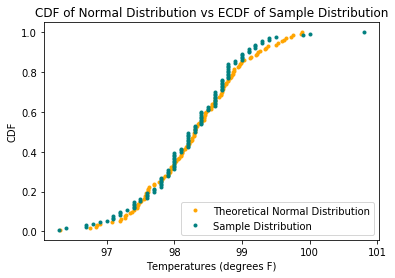

In [14]:
# Compute ECDFs for both theoretical normal distribution and sample
x_theo, y_theo = ecdf(temp_theo)
x_actual, y_actual = ecdf(temperature)

# Plot both ECDFs on the same plot
_ = plt.plot(x_theo, y_theo, marker = '.', linestyle = 'none', color = 'orange')
_ = plt.plot(x_actual, y_actual, marker = '.', linestyle = "none", color = 'teal')
_ = plt.legend(('Theoretical Normal Distribution', 'Sample Distribution'))
_ = plt.title('CDF of Normal Distribution vs ECDF of Sample Distribution')
_ = plt.xlabel('Temperatures (degrees F)')
_ = plt.ylabel('CDF')
plt.show()

From the comparison of ECDF to the theoretical CDF of a normal distribution with the same mean and standard deviation, I see that there's a slight deviation. The sample distribution has most of its mass concentrated in the center and also has a few outliers at the right tail end.

Another way to test for normality graphically is by generating a QQ-plot and inspecting the distributions visually.

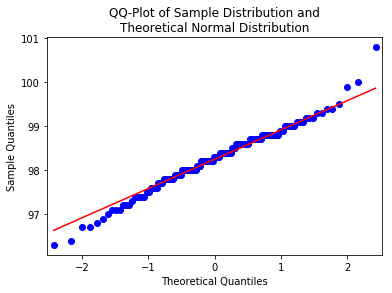

In [41]:
_ = sm.qqplot(temperature, line = 'q')
_ = plt.title('QQ-Plot of Sample Distribution and\nTheoretical Normal Distribution')
plt.show()

From the QQ-plot, I see that at the left tail of the distribution, the sample quantiles are lower than the expected values if they were normally distributed. At the right tail, I see that three points are higher than the expected values if they were normally distributed. This indicates that the sample distribution has longer tails than the theoretical normal distribution. But the deviation from the normal distribution is small. So, it seems that the sample distribution is more-or-less normal.

Another way to examine if the distribution is normal is by performing the Shapiro-Wilk Test.

1. Null Hypothesis: The sample temperatures were sampled from a normal distribution.
2. Alternative Hypothesis: The sample temperatures were not sampled from a normal distribution.

In [28]:
# run the shapiro-wilk test
stats.shapiro(temperature)

(0.9865770936012268, 0.233174666762352)

The results of the Shapiro-Wilk test shows the test statistic of 0.99 and a p-value of 0.23. So, at the 0.05 significance level, I do not reject the null hypothesis that the sample distribution seems to be coming from a population that is normally distributed.

2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [55]:
len(temperature)

130

Sample size is 130, which is a sufficient size to think that the sample can be an adequate representation of the population. The observations are assumed to be coming from a random sample, so I can assume that the samples are independent.

3. Is the true population mean really 98.6 degrees F?
    * First, try a bootstrap hypothesis test.
    * Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    * In this situation, is it appropriate to use the  tt  or  zz  statistic?
    * Now try using the other test. How is the result be different? Why?

### Bootstrap Hypothesis Test

* Null Hypothesis: The true population mean is 98.6 degrees F
* Alternative Hypothesis: The true population mean is not 98.6 degrees F

Procedure:

1. Recenter the data so that the mean is 98.6 degrees F.

In [58]:
# Make an array of translated temperatures to center the data at 98.6 degrees: translated_temperature
translated_temperature = temperature - np.mean(temperature) + 98.6

2. Sample with replacement *n* times using the original sample of size *n* and calculate the mean.
3. Repeat step 2 *B* times. In this case, *B* is 10,000. So now, I have 10,000 means.

In [54]:
# define functions to use for bootstrapping
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1d data"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

# Take bootstrap replicates of translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_temperature, np.mean, 10000)

4. Count the number of times the bootstrap means are less than or equal to the observed mean of 98.25 degrees F. Also, since I am doing a two-sided test, count the number of times the bootstrap means are greater than or equal to 98.95 degrees F, which is the temperature that is same distance from 98.6 degrees as the sample mean of 98.25 degrees F, but 98.95 is greater than 98.6 by 0.35 degrees. 
5. Calculate the p-value by dividng the number from step 4 by *B*, which is 10,000 in this case.

p-value =  0.0


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


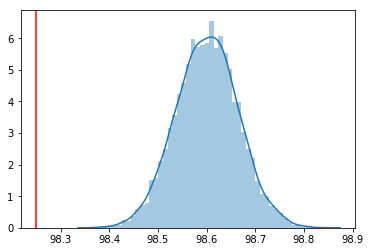

In [56]:
# Compute fraction of replicates that are less than the observed sample mean temperature and greater than 98.95: p_value
p_value = np.sum((bs_replicates <= temp_mean) & (bs_replicates >= 98.6 + (98.6 - temp_mean))) / 10000

# Print the p-value
print('p-value = ', p_value)

# Create a histogram of the bootstrap replicates of mean when recentered at 98.6 degrees
# Add a vertical line at observed mean value from sample temperatures
_ = sns.distplot(bs_replicates, norm_hist = True)
_ = plt.axvline(x=np.mean(temperature), color = 'red')
plt.show()

6. From p-value and significance level $\alpha$, draw conclusion.

    From the bootstrap hypothesis test, I see that the p-value is zero, so I would reject the null hypothesis that the mean of the true population is 98.6 degrees F.

### One-Sample Frequentist Hypothesis Test: T-Test

* Null Hypothesis: The true population mean is 98.6 degrees F
* Alternative Hypothesis: The true population mean is not 98.6 degrees F

Since the population standard deviation is not known, using the t-distribution to obtain the p-value would be appropriate here. However, since the sample size is 130, using the normal distribution to generate the p-value should also be okay.

Procedure:

1. Calculate the test statistic by using the following equation:

$$test\:statistic = \frac{\overline{x} - \mu_{H_0}}{s.e.(\,\overline{x}\,)}$$

    where

$$s.e.(\,\overline{x}\,) = \frac{standard\:deviation(\,\overline{x}\,)}{\sqrt{n}}$$

    where $n$ is the sample size.

In [62]:
# calculate test statistic
test_statistic = (temp_mean - 98.6) / (temp_sd / np.sqrt(len(temperature)))
test_statistic

-5.475925202078116

2. Calculate the p-value using the t-distribution.
    * Calculate degrees of freedom as $n - 1$.

In [65]:
# calculate p-value using the t-distribution
p_value = t.cdf(test_statistic, df = len(temperature) - 1) * 2
p_value

2.1887464624095175e-07

3. Draw conclusion based on the significance level $\alpha$.

    Here, we have a very small p-value. At the 0.05 significance level, I reject the null hypothesis that the sample comes from a distribution with mean 98.6 degrees F.

### One-Sample Frequentist Hypothesis Test: Z-Test

* Null Hypothesis: The true population mean is 98.6 degrees F
* Alternative Hypothesis: The true population mean is not 98.6 degrees F

Procedure:

1. Calculate the test statistic by using the following equation:

$$test\:statistic = \frac{\overline{x} - \mu_{H_0}}{s.e.(\,\overline{x}\,)}$$

    where

$$s.e.(\,\overline{x}\,) = \frac{standard\:deviation(\,\overline{x}\,)}{\sqrt{n}}$$

    where $n$ is the sample size.
    
    The test statistic was already calculated above while doing the t-test. So, proceed to calculating the p-value.

2. Calculate the p-value using the normal distribution.

In [80]:
# calculate p-value
p_value = norm.cdf(test_statistic) * 2
p_value

4.3523151658821886e-08

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
    * Which one is the correct one to use?
    * What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [104]:
sample = np.random.choice(temperature, size = 10)
sample_mean = np.mean(sample)
sample_sd = statistics.stdev(sample)

In [107]:
# z test

x = (sample_mean - 98.6) / (sample_sd / np.sqrt(len(sample)))
norm.cdf(x) * 2

0.40821751521014604

In [110]:
# t test

t.cdf(x, df = len(sample) - 1) * 2

0.42959880408150486

In [111]:
x

-0.8270344860410647

5. At what temperature should we consider someone's temperature to be "abnormal"?
    * As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    * Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [128]:
# bootstrap confidence interval

bs_replicates = draw_bs_reps(translated_temperature, np.mean, 10000)
np.percentile(bs_replicates, [2.5, 97.5])

array([98.47307692, 98.72615385])

In [129]:
# frequentist confidence interval
# 95% CI using t-distribution
t_statistic = t.ppf(q = [.025, .975], df = len(temperature) - 1)
np.mean(translated_temperature) + t_statistic * statistics.stdev(translated_temperature) / np.sqrt(len(temperature))

array([98.47277214, 98.72722786])

In [131]:
# 95% CI using z-distribution
z_statistic = norm.ppf(q = [.025, .975])
np.mean(translated_temperature) + z_statistic * statistics.stdev(translated_temperature) / np.sqrt(len(temperature))

array([98.47396566, 98.72603434])

In [132]:
# what does it mean use formula for one draw, not N draws

6. Is there a significant difference between males and females in normal temperature?
    * What testing approach did you use and why?
    * Write a story with your conclusion in the context of the original problem.

In [141]:
female_temp = df.loc[df.gender == 'F', 'temperature']

In [142]:
male_temp = df.loc[df.gender == 'M', 'temperature']

In [159]:
# same distribution? permutation test
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def permutation_sample(data_1, data_2):
    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

def draw_perm_reps(d1, d2, func, size=1):
    return np.array([func(*permutation_sample(d1, d2)) for i in range(size)])

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(female_temp, male_temp)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(female_temp, male_temp,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0116


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


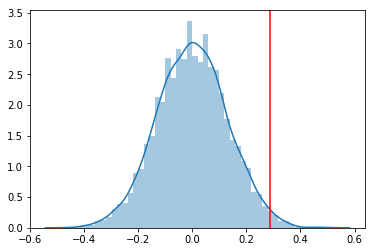

In [156]:
_ = sns.distplot(perm_replicates)
_ = plt.axvline(x=empirical_diff_means, color = 'red')
plt.show()

In [160]:
# bootstrap test of means

# Compute mean of all forces: mean_temperature
mean_temperature = np.mean(temperature)

# Generate shifted arrays
female_temp_shifted = female_temp - np.mean(female_temp) + mean_temperature
male_temp_shifted = male_temp - np.mean(male_temp) + mean_temperature

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(female_temp_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(male_temp_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0099


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


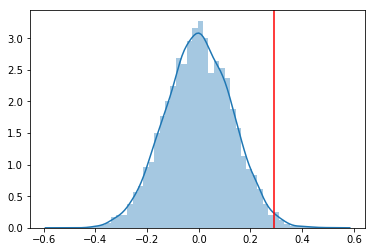

In [161]:
_ = sns.distplot(perm_replicates)
_ = plt.axvline(x=empirical_diff_means, color = 'red')
plt.show()